#
Aizhan Borubaeva

Prediction with Machine Learning for Economists 

2023/24 Fall

Assignment 1


Below you can find the code for Assignment 1. 

1) Importing packages: 

In [1]:
import os
import sys
import warnings

!pip install pyfixest 

import pandas as pd
import numpy as np
#from mizani.formatters import percent_format
import matplotlib.pyplot as plt
from plotnine import *
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from mizani import transforms
#import Stargazer
from IPython.core.display import HTML
from sklearn.linear_model import LinearRegression
#from pyfixest import models
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

2) Importing additional packages

In [2]:
from pyfixest.estimation import feols
from pyfixest.utils import get_data

3) Read the file:

In [3]:
df=pd.read_csv("morg-2014-emp.csv", low_memory=False)

4. Creating new veriables for simple regressiion:

In [4]:
df["female"] = (df.sex == 2).astype(int)
df["earnings_per_hour"] = df["earnwke"] / df["uhours"]
df["ln_earnings_per_hour"] = np.log(df["earnings_per_hour"])

5. Creating addtional variables for other models:

In [5]:
df["Masters"]=(df.grade92==44).astype(int)
print("Created 'Masters' column.")

df["PhD"]=(df.grade92==46).astype(int)
print("Created 'PhD' column.")

df["Married"]=(df.marital<=3).astype(int)
print("Created 'Married' column.")

df["No_children"]=(df.chldpres==0).astype(int)
print("Created 'No_children' column.")

Created 'Masters' column.
Created 'PhD' column.
Created 'Married' column.
Created 'No_children' column.


7. Filtering data according to chosen occupation - Chief executives

In [6]:
CEdata=df[df["occ2012"]==10].copy()  #Chief executives occupation data

In [7]:
target = 'ln_earnings_per_hour'
predictors = ['female', 'age', 'Masters', 'PhD', "Married","No_children"]

In [8]:
print(len(CEdata)) # for checking

1274


In [9]:
# train_data, test_data = train_test_split(CEdata, test_size=0.2, random_state=20) - in case if we want to create a model on test_ data and make predictions
#print(len(train_data)) #for checking

9. Descriptive statistics of all data and further for test data:

In [11]:
CEdata.loc[:, ["earnwke", "uhours", 'ln_earnings_per_hour','female', 'age', 'Masters', 'PhD', "Married","No_children"]].describe()

,earnwke,uhours,ln_earnings_per_hour,female,age,Masters,PhD,Married,No_children
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,2013.636028,47.460754,3.642047,0.279435,49.047096,0.293564,0.030612,0.821036,0.563579
std,815.175259,9.654216,0.577918,0.448898,9.244313,0.455573,0.172332,0.383473,0.496136
min,1.000000,5.000000,-3.036554,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,1346.000000,40.000000,3.372275,0.000000,43.000000,0.000000,0.000000,1.000000,0.000000
50%,2086.460000,45.000000,3.781341,0.000000,50.000000,0.000000,0.000000,1.000000,1.000000
75%,2884.610000,50.000000,4.055122,1.000000,56.000000,1.000000,0.000000,1.000000,1.000000
max,2884.610000,99.000000,6.175386,1.000000,64.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#train_data.loc[:, ["earnwke", "uhours", 'ln_earnings_per_hour','female', 'age', 'Masters', 'PhD', "Married","No_children"]].describe()

10. Checking four chosen models using OLS_Fixed effect regression from PyFixest: 
    1) Simple regression (log-level) where ln_earnings_per_hour - dependent variable, female - independent variable
    2) Multiple regression (log-level) with additional independent variable - age
    3) Multiple regression (log-level) with additional independent variables. ln_earnings_per_hour - dependent variable,female,age, Masters, PhD, Married, No_children - independent variables
    4) Multiple regression (log-level)with additional independent variables. ln_earnings_per_hour - dependent variable, female,age, Masters, PhD, Married, No_children - independent variables

In [28]:
model_1 = feols(fml="ln_earnings_per_hour~female", data=CEdata, vcov="HC1")

model_2 = feols(fml="ln_earnings_per_hour~female+age", data=CEdata, vcov="HC1")

model_3 = feols(fml="ln_earnings_per_hour~female+age+Masters+PhD", data=CEdata, vcov="HC1")

model_4 = feols(fml="ln_earnings_per_hour~female+age+Masters+PhD+Married+No_children", data=CEdata, vcov="HC1")


In [30]:
CEdata["prediction_1"] = model_1.predict()
CEdata["prediction_2"] = model_2.predict()
CEdata["prediction_3"] = model_3.predict()
CEdata["prediction_4"] = model_4.predict()

11. Creating tables visualizing data for models above:

In [32]:
print(model_1.summary())
print(model_2.summary())
print(model_3.summary())
print(model_4.summary())

###

Estimation:  OLS
Dep. var.: ln_earnings_per_hour
Inference:  HC1
Observations:  1274

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5 % |   97.5 % |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|---------:|
| Intercept     |      3.692 |        0.016 |   233.508 |      0.000 |   3.661 |    3.723 |
| female        |     -0.178 |        0.043 |    -4.112 |      0.000 |  -0.264 |   -0.093 |
---
RMSE: 0.572  Adj. R2: 0.018  Adj. R2 Within: 0.018
None
###

Estimation:  OLS
Dep. var.: ln_earnings_per_hour
Inference:  HC1
Observations:  1274

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5 % |   97.5 % |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|---------:|
| Intercept     |      3.483 |        0.095 |    36.610 |      0.000 |   3.297 |    3.670 |
| female        |     -0.173 |        0.043 |    -3.990 |      0.000 |  -0.257 |   -0.088 |
| age           |     

12. Calculating RMSE:

In [33]:
# Calculate RMSE and display 
rmse_scores = [np.sqrt(mean_squared_error(test_data["ln_earnings_per_hour"], test_data[f"prediction_{i+1}"])) for i in range(4)]
print("RMSE Scores:", rmse_scores)

RMSE Scores: [0.666921690698013, 0.6666546509022213, 0.6590703265105297, 0.636887071070966]


13. Here I should calculate BIC scores, however I could not do it for 'feols' module, so I calculated it manually through another regression command:

In [34]:
reg1 = smf.ols(formula="ln_earnings_per_hour~female", data=train_data).fit(cov_type="HC1")
reg2 = smf.ols(formula="ln_earnings_per_hour~female+age", data=train_data).fit(cov_type="HC1")
reg3 = smf.ols(formula="ln_earnings_per_hour~female+age+Masters+PhD", data=train_data).fit(cov_type="HC1")
reg4 = smf.ols(formula="ln_earnings_per_hour~female+age+Masters+PhD+Married+No_children", data=train_data).fit(cov_type="HC1")

regs_list=[reg1,reg2,reg3,reg4]

n = len(test_data)
k = len(predictors) + 1  # Number of predictors + intercept
bic_scores = [n * np.log(mean_squared_error(test_data["ln_earnings_per_hour"], reg.predict(test_data[predictors]))) + k * np.log(n) for reg in regs_list]
print("BIC Scores:", bic_scores)

BIC Scores: [-167.7365548713969, -167.61767111968874, -173.04803956836986, -177.95385083167213]


14. Visualization of the Relationship between Model Complexity and RMSE:

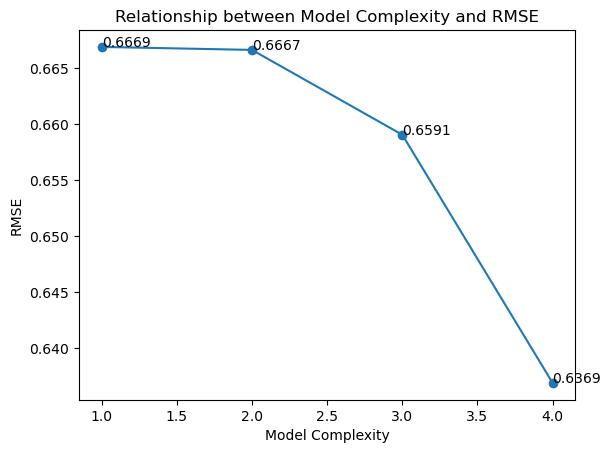

In [19]:
model_complexity = [1, 2, 3, 4]
plt.plot(model_complexity, rmse_scores, marker='o')

for i, txt in enumerate(rmse_scores):
    plt.annotate(f'{txt:.4f}', (model_complexity[i], rmse_scores[i]))

plt.xlabel('Model Complexity')
plt.ylabel('RMSE')
plt.title('Relationship between Model Complexity and RMSE')
plt.show()